<a href="https://colab.research.google.com/github/gagusti/algorithm-opt-viu/blob/main/Algoritmos_Guillermo_Agusti_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG1 - Actividad Guiada 1

Guillermo Agusti

GitHub: https://github.com/gagusti/algorithm-opt-viu/blob/main/Algoritmos_Guillermo_Agusti_AG1.ipynb

In [ ]:
# Torres de Hanoi
def torres_hanoi(N, origen, destino, pivote):
    if N == 1:
        print(f"Mover bloque desde {origen} a {destino}")
        return

    torres_hanoi(N-1, origen, pivote, destino)
    print(f"Mover bloque desde {origen} a {destino}")
    torres_hanoi(N-1, pivote, destino, origen)

torres_hanoi(4, 1, 3, 2)

Mover bloque desde 1 a 2
Mover bloque desde 1 a 3
Mover bloque desde 2 a 3
Mover bloque desde 1 a 2
Mover bloque desde 3 a 1
Mover bloque desde 3 a 2
Mover bloque desde 1 a 2
Mover bloque desde 1 a 3
Mover bloque desde 2 a 3
Mover bloque desde 2 a 1
Mover bloque desde 3 a 1
Mover bloque desde 2 a 3
Mover bloque desde 1 a 2
Mover bloque desde 1 a 3
Mover bloque desde 2 a 3


Cambio de monedas [25, 10, 5, 1]
Definimos la función: cambio_monedas con dos parámetros: Cantidad a calcular y sistema monetario


In [ ]:
# Devolver cambio

def cambio_moneda(cantidad, sistema):
  print("Sistema: ")
  print(sistema)

  solucion = [0 for _ in range(len(sistema))] #crea lista ceros (dimensión del sistema)
  valor_acumulado = 0

  for indice, valor in enumerate(sistema):
    monedas=int((cantidad-valor_acumulado)/valor)
    solucion[indice] = monedas
    valor_acumulado += monedas*valor
    if valor_acumulado == cantidad: break

  return solucion

sistema = [25,10,5,1]
cambio_moneda(54, sistema)

Sistema: 
[25, 10, 5, 1]


[2, 0, 0, 4]

**Problema:** Encontrar los dos puntos más cercanos en una lista de números 1D, 2D y 3D.

El primer algoritmo planteado es por fuerza bruta. En forma resumida lo que hace es recorrer la lista de n puntos y calcula la distancia de los n-1 puntos, en forma consecutiva uno a uno para poder determinar cual es el mínimo valor etre los n puntos.

**Análisis de la Complejidad Temporal**
* (1) 2 Asignaciones
* (2) n asignaciones
* (3) n*m asignaciones
* (4) n*m cálculo de la distancia
* (5) n*m validación de la distancia y el mínimo
* (6) 3(n-1) asignaciones de valor de distancia y puntos que corresponden a la distancia mínima


In [1]:
# Algoritmo para encontrar dos puntos más cercanos por fuerza bruta
import random

def nearest_points_bf(points):
  n_points = [0,0]  # (1)
  min_distance = -1 # (1)
  for i in range(len(points)):  # (2)
    for j in range(1, len(points)-1): # (3)
      distance = abs(points[i] - points[j]) # (4)
      if distance > 0 and (min_distance < 0 or min_distance > distance):  #(5)
        min_distance = distance #(6)
        n_points[0] = points[i] #(6)
        n_points[1] = points[j] #(6)
  return n_points

# points = [3403, 4537, 9089, 9746, 7259]
# print(nearest_points_bf(points))
points = random.sample(range(100, 99999), 10000)
print(nearest_points_bf(points))
#print(points)

[20765, 20766]


Se puede mejorar creando un Algoritmo con la Técnica de Divide y Vencerás, además con recursión recorriendo las distintas particiones hechas a las lista y calculando las distancias para determinar cuál es la mínima. Para el cálculo de las distancias en el caso de la lista 1D se utilizó la distancia entre dos puntos calculando su valor absoluto (distancia del intérvalo) y en el caso de las listas 2D y 3D, utilizo la distancia Euclidiana.

**Análisis de Complejidad Temporal**
Con este algoritmo se reduce la complejidad a lineal $O(n)$ con la utilización de la técnica iterativa.

In [2]:
# Algoritmo para encontrar dos puntos 1D más cercanos con la técnica de Divide y Vencerás
import random

def check_minimum(p1, p2, distance, min_distance, min_points):
  if distance > 0 and (min_distance < 0 or min_distance > distance):
    return p1, p2, distance
  return min_points[0], min_points[1], min_distance

def nearest_points_dc(points, low, high):
  min_distance = -1
  n_points = [0,0]
  last_point = 0
  size = high-low

  if size == 2:
    return points[low], points[high-1], abs(points[low]-points[high-1])

  if size % 2 == 0:
    end_point = size // 2
    p1, p2, dist = nearest_points_dc(points, 0, end_point)
    n_points[0], n_points[1], min_distance = check_minimum(p1, p2, dist, min_distance, n_points)
  else:
    start_point = (size - 1) // 2
    last_point = points[size - 1]
    p1, p2, dist = nearest_points_dc(points, start_point, len(points) - 1)
    n_points[0], n_points[1], min_distance = check_minimum(p1, p2, dist, min_distance, n_points)

    if last_point > 0:
      if abs(n_points[0]-last_point) < min_distance:
        min_distance = abs(n_points[0]-last_point)
        n_points[1] = last_point
      elif abs(n_points[1]-last_point) < min_distance:
        min_distance = abs(n_points[1]-last_point)
        n_points[1] = last_point

  return n_points[0], n_points[1], min_distance

points_1D = [random.randrange(1, 10000) for x in range(10000)]
print(points_1D)
print(nearest_points_dc(points_1D, 0, len(points_1D)))

[4230, 800, 7963, 9574, 8574, 6185, 2599, 6831, 2098, 6549, 3683, 1764, 5700, 6509, 3007, 8173, 8534, 9141, 8019, 6204, 209, 3495, 5315, 264, 2029, 3324, 5868, 7831, 5152, 4107, 4611, 677, 9199, 3245, 8806, 4699, 6643, 671, 6649, 3701, 5660, 7238, 4119, 3677, 2826, 5291, 5984, 2348, 6514, 8470, 1257, 647, 1153, 710, 8895, 5405, 5674, 2868, 8244, 7611, 3744, 2590, 3167, 8711, 6021, 9215, 7580, 5184, 9466, 3452, 4995, 3202, 1955, 8831, 1111, 7136, 573, 882, 4563, 1635, 8347, 5735, 5301, 6131, 4193, 3548, 7816, 6794, 4545, 127, 5796, 4848, 7472, 5592, 6083, 2600, 3010, 5922, 9945, 436, 6993, 8651, 1410, 170, 8511, 284, 513, 7459, 1595, 1044, 359, 7002, 3313, 5589, 166, 8896, 4800, 797, 5278, 8992, 9364, 3762, 8617, 981, 5217, 974, 138, 1624, 6723, 2524, 4415, 1521, 9956, 5532, 4700, 748, 7150, 7063, 6410, 1000, 9668, 2545, 3604, 3807, 9907, 6807, 7769, 4861, 4018, 819, 7394, 6859, 9880, 459, 7879, 450, 8867, 3212, 5318, 8591, 4461, 1174, 8741, 116, 2464, 2199, 3702, 4502, 4194, 7724, 8660

In [ ]:
# Algoritmo para encontrar dos puntos 2D y 3D más cercanos con la técnica de Divide y Vencerás
import random
import math

def euclidean_distance(p, q):
  dist = 0
  for i in range(len(p)):
      dist += (p[i] - q[i])**2
  return math.sqrt(dist)

def check_minimum(p1, p2, distance, min_distance, min_points):
  if distance[0] > 0 and (min_distance < 0 or min_distance > distance[0]):
    return p1, p2, distance[0]
  return min_points[0], min_points[1], min_distance

def nearest_points_nd_dc(points, low, high):
  min_distance = -1
  n_points = [(),()]
  last_point = ()
  size = high-low

  if size == 2:
    return points[low], points[high-1], (euclidean_distance(points[low], points[high-1]),0)

  if size % 2 == 0:
    end_point = size // 2
    p1, p2, dist = nearest_points_nd_dc(points, 0, end_point)
    n_points[0], n_points[1], min_distance = check_minimum(p1, p2, dist, min_distance, n_points)
  else:
    start_point = (size - 1) // 2
    last_point = points[size - 1]
    p1, p2, dist = nearest_points_nd_dc(points, start_point, len(points) - 1)
    n_points[0], n_points[1], min_distance = check_minimum(p1, p2, dist, min_distance, n_points)

    if last_point[0] > 0 and last_point[1] > 0:
      if euclidean_distance(n_points[0],last_point) < min_distance:
        min_distance = euclidean_distance(n_points[0],last_point)
        n_points[1] = last_point
      elif euclidean_distance(n_points[1],last_point) < min_distance:
        min_distance = euclidean_distance(n_points[1],last_point)
        n_points[1] = last_point

  return n_points[0], n_points[1], (min_distance, 0)

points_2D = [(random.randrange(1, 10000),random.randrange(1, 10000))  for x in range(10000)]
print(points_2D)
print(nearest_points_nd_dc(points_2D, 0, len(points_2D)))
points_3D = [(random.randrange(1, 10000),random.randrange(1, 10000),random.randrange(1, 10000))  for x in range(10000)]
print(points_3D)
print(nearest_points_nd_dc(points_3D, 0, len(points_3D)))

[(9702, 4916), (3776, 4830), (8086, 5050), (2556, 3298), (5127, 6059), (5111, 8215), (6753, 6965), (9366, 5286), (3621, 348), (2665, 18), (3334, 2085), (1607, 9709), (6318, 5531), (70, 1503), (1611, 6441), (9319, 6319), (5922, 9073), (4790, 8280), (3528, 5437), (8748, 1155), (7595, 1379), (3710, 9046), (8381, 6519), (154, 3411), (9178, 9456), (8167, 8480), (1930, 8203), (4850, 5200), (9951, 2194), (4811, 9206), (6700, 461), (514, 230), (4906, 5312), (3672, 9705), (7295, 2741), (6050, 5888), (5788, 8167), (4492, 8664), (1027, 2359), (4335, 6404), (7960, 37), (1425, 5717), (4308, 8626), (2106, 5137), (1312, 6305), (4401, 1296), (6334, 2640), (1906, 3180), (69, 9984), (5496, 2658), (8550, 8799), (8544, 5521), (4973, 2421), (1687, 3208), (2352, 9547), (3419, 8681), (3365, 5721), (3078, 8302), (3826, 9441), (4594, 5610), (4563, 4850), (4218, 8388), (3459, 737), (6921, 5199), (7983, 4006), (545, 5133), (8678, 7708), (8221, 3100), (624, 8105), (5958, 4328), (9109, 3158), (2386, 4834), (280, 6

Con esta técnica de Divide y Vencerás y recursividad parecería que no podría mejorarse más de lo que está, ya que el algoritmo tiene que ser exahustivo y recorrer todos los puntos en la lista, es decir, no podríamos hacer backtracking para solo evaluar los mínimos en el camino, ya que no tenemos distancias calculadas entre los puntos y debemos calcularlas a medida que avanzamos.

Existen otros algoritmos para calcular la mínima distancia entre dos puntos o el punto más cercano.

## Triangulación Delaunay

Este es el algoritmo denominado Triangulación Delaunay (también conocido como Delone). Este algoritmo confia en operaciones rápidas para detectar cuando un punto está dentro de un triángulo circumcirculo y una eficiente estructura de datos para almacenar triángulos y vértices. En dos dimensiones una forma de detectar si un punto D cae en un circumcirculo de A,B,C es evaluando el determinate:

\begin{align*}
\begin{vmatrix}
A_x & A_y & A_x^2+A_y^2 & 1\\
B_x & B_y & B_x^2+B_y^2 & 1\\
C_x & C_y & C_x^2+C_y^2 & 1\\
D_x & D_y & D_x^2+_y^2 &  1
\end{vmatrix}
&=
\begin{vmatrix}
A_x - D_x & A_y - D_y & (A_x - D_x)^2 + (A_y - D_y)^2 \\
B_x - D_x & B_y - D_y & (B_x - D_x)^2 + (B_y - D_y)^2 \\
C_x - D_x & C_y - D_y & (C_x - D_x)^2 + (C_y - D_y)^2 \\
\end{vmatrix}> 0
\end{align*}


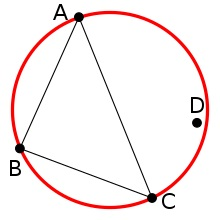

**Punto D dentro del circumcirculo de A,B,C**
[Fuente Wikipedia](https://en.wikipedia.org/wiki/Delaunay_triangulation#:~:text=In%20mathematics%20and%20computational%20geometry,triangle%20in%20DT(P).)

Cuando A,B,C están dispuestas en sentido a las agujas del reloj, el determinante es positivo solo si D cae dentro del circumcirculo.

### Algoritmo con la técnica de rotación
Si el triángulo no es Delaunay, podemos rotar uno de sus vértices. Esto lleva a un algoritmo simple, entonces consiste en contruir cualquier triangulación entre los puntos y rotar los vértices a hasta que no haya triángulos no Delaunay. Esto puede llevar $\Omega(n^2)$ rotaciones de vértices.

### Incremental

Con esta técnica se agrega repetidamente un vértice a la vez, haciendo la trinagulación de las partes del gráfico.  Cuando se agrega el vértice v, se divide en tres el triángulo que contiene a v, entonces se aplica el algoritmo de rotación. Esto lleva el tiempo de $O(n)$, busca todos los triángulos para encontrar uno que contiene v, de esta forma se rotan todos los triángulos. Toda la ejecución es de $O(n^2)$.
